# Import Required Libraries
This notebook analyzes the dark current as a function of exposure time using the FLIR/Spinnaker camera. We will import numpy, matplotlib, and the `acquire_images` function from `utils.py`.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils import acquire_images
print("test")

test


# Define Exposure Times
Set up the exposure times (in microseconds) using `np.logspace` to cover a wide range for dark current analysis.

In [ ]:
# Define exposure times in microseconds (us)
exposure_times = np.logspace(5, 7, num=4, dtype=int)
Ncoadd = 2  # Number of images to coadd for each exposure time
outdir = "C:\\Users\\JB_Ch\\Documents\\code\\astrotech\\images"  # Output directory for images
prefix = "dark_test"  # Prefix for output files

# Acquire Images for Each Exposure Time
For each exposure time, acquire a stack of images using the camera. This step may take some time depending on the number of exposure times and coadds.

In [8]:
# Acquire images for each exposure time
image_stacks = []
for tint in exposure_times:
    images = acquire_images(tint, Ncoadd,outdir=outdir,prefix=prefix)
    print(f"Exposure time: {tint} us, images shape: {images.shape}")
    image_stacks.append(images)

Camera temperature: 37.88 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\dark_hot_tint100000_coadd2.fits
Exposure time: 100000 us, images shape: (2, 1240, 1616)
Camera temperature: 64.88 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\dark_hot_tint464158_coadd2.fits
Exposure time: 464158 us, images shape: (2, 1240, 1616)
Camera temperature: 64.88 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\dark_hot_tint2154434_coadd2.fits
Exposure time: 2154434 us, images shape: (2, 1240, 1616)
Camera temperature: 64.88 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\dark_hot_tint10000000_coadd2.fits
Exposure time: 10000000 us, images shape: (2, 1240, 1616)


# Compute Mean Dark Signal
For each stack of images, compute the mean signal per pixel for each image, then average over all coadds to get the mean dark current for that exposure time.

In [9]:
from astropy.io import fits
import os
import numpy as np

# Assuming image_stacks, exposure_times, outdir, prefix, and Ncoadd are defined

dark_currents = []
detector_temps = []

for tint in exposure_times:
    fits_path = os.path.join(outdir, f"{prefix}_tint{int(tint)}_coadd{Ncoadd}.fits")
    with fits.open(fits_path) as hdul:
        mean_image = hdul['MEAN'].data
        header = hdul['MEAN'].header
        dark_current = np.mean(mean_image)
        dark_currents.append(dark_current)
        temp = header.get('DETTEMP', None)
        detector_temps.append(temp)
        print(f"Exposure time: {tint} us, mean dark: {dark_current:.2f}, temp: {temp}")
dark_currents = np.array(dark_currents)
detector_temps = np.array(detector_temps)

Exposure time: 100000 us, mean dark: 0.00, temp: 37.875
Exposure time: 464158 us, mean dark: 0.00, temp: 64.875
Exposure time: 2154434 us, mean dark: 0.01, temp: 64.875
Exposure time: 10000000 us, mean dark: 0.08, temp: 64.875


# Plot Dark Current vs Exposure Time
Plot the mean dark current as a function of exposure time using matplotlib. The x-axis is in seconds, and the y-axis is the mean dark signal (ADU).

In [10]:
print(detector_temps)

[37.875 64.875 64.875 64.875]


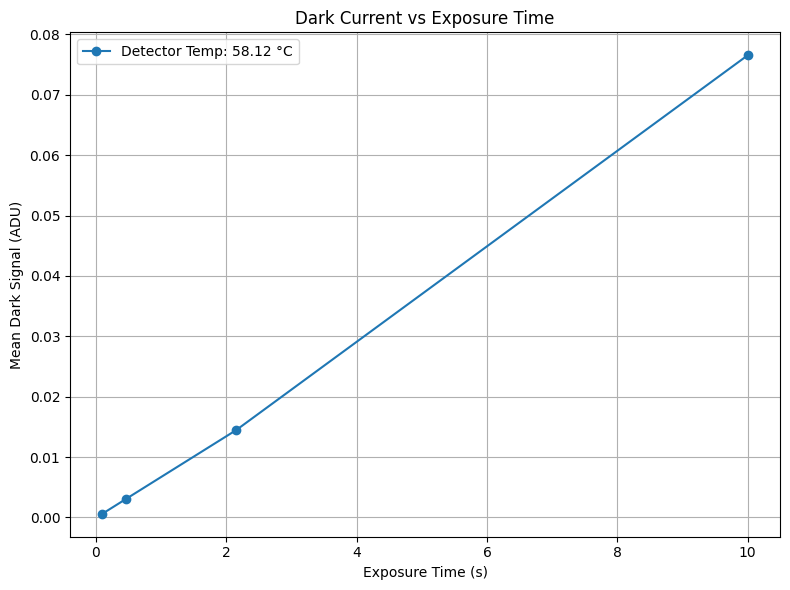

In [11]:
plt.figure(figsize=(8,6))
plt.plot(exposure_times/1e6, dark_currents, marker='o', label=f"Detector Temp: {np.mean(detector_temps):.2f} °C")
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Dark Signal (ADU)')
plt.title('Dark Current vs Exposure Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Dark Current at Different Detector Temperatures

In this section, we compare the dark current as a function of exposure time for two different measurement sequences (e.g., taken at different detector temperatures). This allows us to visualize the temperature dependence of the dark current.

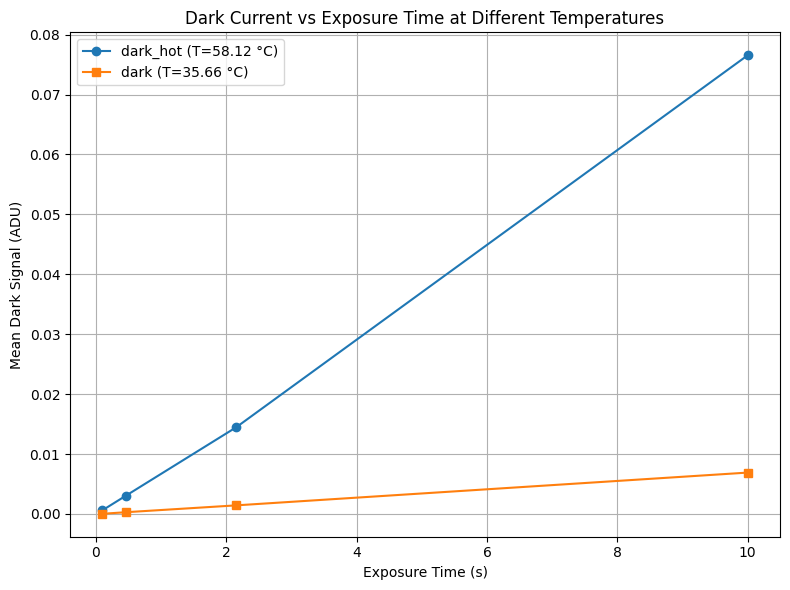

In [12]:
from astropy.io import fits
import os

# Define the two prefixes for the two sequences
prefix1 = "dark_hot"   # e.g., high temperature sequence
prefix2 =  "dark" # e.g., low temperature sequence

# Function to read dark current and temperature for a given prefix
def read_dark_curve(prefix):
    dark_currents = []
    detector_temps = []
    for tint in exposure_times:
        fits_path = os.path.join(outdir, f"{prefix}_tint{int(tint)}_coadd{Ncoadd}.fits")
        with fits.open(fits_path) as hdul:
            mean_image = hdul['MEAN'].data
            header = hdul['MEAN'].header
            dark_current = np.mean(mean_image)
            dark_currents.append(dark_current)
            temp = header.get('DETTEMP', None)
            detector_temps.append(temp)
    return np.array(dark_currents), np.array(detector_temps)

# Read both sequences
curve1, temps1 = read_dark_curve(prefix1)
curve2, temps2 = read_dark_curve(prefix2)

plt.figure(figsize=(8,6))
plt.plot(exposure_times/1e6, curve1, 'o-', label=f"{prefix1} (T={np.mean(temps1):.2f} °C)")
plt.plot(exposure_times/1e6, curve2, 's-', label=f"{prefix2} (T={np.mean(temps2):.2f} °C)")
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Dark Signal (ADU)')
plt.title('Dark Current vs Exposure Time at Different Temperatures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
